This script solves the homogeneous spring equation:
$$m \frac{d^2 z}{dt^2} + c \frac{dz}{dt} + kz = F(t), \ \ \ z(0) = z_0, \ \ \  \frac{dz}{dt}(0) = v_0 $$
where $m$ is the mass (kg), $c$ represents the damper (kg / s), and $k$ represents the spring stiffness (kg/$s^2$). $F(t)$ represents the forcing term

The second order system is recast as two-dimensional, first order system

$$\frac{d\mathbf{u}}{dt} = \mathbf{A}\mathbf{u} + \mathbf{F}, \ \ \mathbf{u} = \begin{bmatrix} z \\ \frac{dz}{dt} \end{bmatrix}, \ \  \mathbf{A} = \begin{bmatrix} 0 & 1 \\ -k/m & -c/m \end{bmatrix}, \ \ \mathbf{F}=\begin{bmatrix}0 \\ F(t) \end{bmatrix}$$

where $\mathbf{u}_0 = [z_0,v_0]^\top$ are the initial conditions.

This script solves the homogeneous spring equation:
$$m \frac{d^2 z}{dt^2} + c \frac{dz}{dt} + kz = F(t), \ \ \ z(0) = z_0, \ \ \  \frac{dz}{dt}(0) = v_0 $$
where $m$ is the mass (kg), $c$ represents the damper (kg / s), and $k$ represents the spring stiffness (kg/$s^2$). $F(t)$ represents the forcing term

The second order system is recast as two-dimensional, first order system

$$\frac{d\mathbf{u}}{dt} = \mathbf{A}\mathbf{u} + \mathbf{F}, \ \ \mathbf{u} = \begin{bmatrix} z \\ \frac{dz}{dt} \end{bmatrix}, \ \  \mathbf{A} = \begin{bmatrix} 0 & 1 \\ -k/m & -c/m \end{bmatrix}, \ \ \mathbf{F}=\begin{bmatrix}0 \\ F(t) \end{bmatrix}$$

where $\mathbf{u}_0 = [z_0,v_0]^\top$ are the initial conditions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [5]:
# Spring model function
def forcing_term(f0,omegaF,t):
    return f0*np.cos(omegaF*t)

def spring_model(y, t, params):
    m, c, k, f0, omegaF = params
    x, v = y
    F = forcing_term(f0,omegaF,t)

    # RHS equations
    dxdt = v
    dvdt = (-c * v - k * x) / m + F/m
    return [dxdt, dvdt]

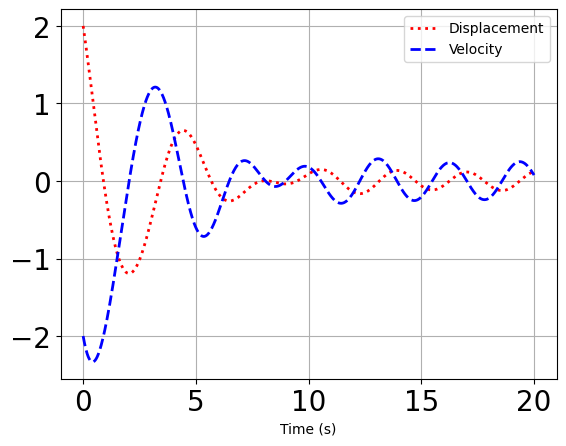

In [9]:


# Define the initial conditions
x0 = 2
v0 = -2
IC = [x0, v0]

# The spring model parameters
m = 3      # Mass, kg
c = 2      # Damper friction, kg/s
k = 5      # Spring resistance, kg/s^2
f0 = 1     # forcing term (kg m /s^2)
omegaF = 2 # frequency of forcing term (rad/s)

# Parameters as a list
params = [m, c, k,f0,omegaF]

# Define the end time for numerical solution and the time points
tend = 20
tspace = np.linspace(0, tend, 1000)



# Solve the system
solution = odeint(spring_model, IC, tspace, args=(params,))

# Plotting routine
plt.figure()
plt.plot(tspace, solution[:, 0], ':r', linewidth=2, label='Displacement')
plt.plot(tspace, solution[:, 1], '--b', linewidth=2, label='Velocity')
plt.legend()
plt.grid()
plt.xlabel('Time (s)')
plt.gca().tick_params(labelsize=20)
plt.show()
